In [2]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn import linear_model
plt.rc('font', family='Times New Roman')


In [3]:
def generate_cycle(A, period,phase, adding):
    for index, p in enumerate(period):
        if p < 0:
            period[index] = -p
    def sin_function(x, A, T):
        return A * np.sin( 2 * np.pi / T * (x + phase)) + adding
    total_step = 1000 # 100 T
    total_distance = 0
    cycle = []
    for step in range(total_step):
        half_period = period[step] / 2
        if(step % 2 == 0):
            sub_step_list = np.linspace(0, half_period, 100).tolist()
            for sub_step in sub_step_list:
                cycle.append(sin_function(sub_step, A[step], period[step]))
            total_distance += half_period
        else:
            sub_step_list = np.linspace(half_period, period[step], 100).tolist()
            for sub_step in sub_step_list:
                cycle.append(sin_function(sub_step, A[step], period[step]))
            total_distance += half_period
    return cycle, total_distance

In [4]:
def generate_cycle(A, period,phase, adding):
    for index, p in enumerate(period):
        if p < 0:
            period[index] = -p
    def sin_function(x, A, T):
        return A * np.sin( 2 * np.pi / T * (x + phase)) + adding
    total_step = 1000 # 100 T
    total_distance = 0
    cycle = []
    for step in range(total_step):
        half_period = period[step] / 2
        if(step % 2 == 0):
            sub_step_list = np.linspace(0, half_period, 100).tolist()
            for sub_step in sub_step_list:
                cycle.append(sin_function(sub_step, A[step], period[step]))
            total_distance += half_period
        else:
            sub_step_list = np.linspace(half_period, period[step], 100).tolist()
            for sub_step in sub_step_list:
                cycle.append(sin_function(sub_step, A[step], period[step]))
            total_distance += half_period
    return cycle, total_distance

soil_moisture = []
for month in range(1, 10):
    f = nc.Dataset("../Data/2017_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-20170"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    soil_moisture.append(sm[0][193][249])
for month in range(10, 13):
    f = nc.Dataset("../Data/2017_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-2017"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    soil_moisture.append(sm[0][193][249])
for month in range(1, 10):
    f = nc.Dataset("../Data/2018_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-20180"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    processed_data = 0
    if(sm[0][193][249] == -9999.):
        _ = 0
        for j in range (-15, 15):
            if(sm[0][193][249+j] != -9999.):
                if(_ == 0):
                    _ = sm[0][193][249+j]
                else:
                    _ = (sm[0][193][249+j] + _)/2
        processed_data = _
    if(sm[0][193][249] != -9999.):
        soil_moisture.append(sm[0][193][249])
    else:
        soil_moisture.append(processed_data)
for month in range(10, 13):
    f = nc.Dataset("../Data/2018_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-2018"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    processed_data = 0
    if(sm[0][193][249] == -9999.):
        _ = 0
        for j in range (-15, 15):
            if(sm[0][193][249+j] != -9999.):
                if(_ == 0):
                    _ = sm[0][193][249+j]
                else:
                    _ = (sm[0][193][249+j] + _)/2
        processed_data = _
    if(sm[0][193][249] != -9999.):
        soil_moisture.append(sm[0][193][249])
    else:
        soil_moisture.append(processed_data)
for index, data in enumerate(soil_moisture):
    if(data == 0):
        data = (soil_moisture[index-1] + soil_moisture[index+1])/2
        soil_moisture[index] = data
air_pressure_california = pd.DataFrame(pd.read_csv("../Data/California_data/AirPressure.csv"))
air_pressure_list = air_pressure_california.values[0].tolist() + air_pressure_california.values[1].tolist()
rainfall_california = pd.DataFrame(pd.read_csv("../Data/California_data/ObservedRainfall.csv"))
rainfall_list = rainfall_california.values[0].tolist() + rainfall_california.values[1].tolist()
temperature_california = pd.DataFrame(pd.read_csv("../Data/California_data/Temperature.csv"))
temperature_list = temperature_california.values[0].tolist() + temperature_california.values[1].tolist()
rainfall_list[11] = (rainfall_list[12] + rainfall_list[10])/2
rainfall_list[13] = (rainfall_list[12] + rainfall_list[14])/1.5
rainfall_list[-1] = (rainfall_list[-2])*1.5
rainfall_list[0], rainfall_list[1] = rainfall_list[1], rainfall_list[0]
rainfall_list[0], rainfall_list[2] = rainfall_list[2], rainfall_list[0]
rainfall_list[3] = (rainfall_list[2] + rainfall_list[4])/2
for i in range(4, 11):
    rainfall_list[i] = (rainfall_list[i-1] + rainfall_list[i+1])/2 
for i in range(16, 22):
    rainfall_list[i] = (rainfall_list[i-1] + rainfall_list[i+1])/2 
rainfall_list = [i/3 for i in rainfall_list]
air_pressure_list, rainfall_list, temperature_list = np.array(air_pressure_list), np.array(rainfall_list), np.array(temperature_list)
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s
model = linear_model.LinearRegression()
df_train = pd.DataFrame({'rainfall': rainfall_list , 'temperature': np.log(temperature_list), 'soil_moisture': soil_moisture})
model.fit(df_train[['rainfall']], df_train['soil_moisture'])
A = np.random.normal(12, 15, 5000)
period = np.random.normal(12, 15, 5000)
period = [-p for p in period if p < 0] + [p for p in period if p > 0]
adding = 70
temp_cycle,temp_distance = generate_cycle(A, period, 0, adding)
A = np.random.normal(5/3, 5, 5000)
period = np.random.normal(12, 15, 5000)
period = [-p for p in period if p < 0] + [p for p in period if p > 0]
adding = 0
rainfall_cycle,rainfall_distance = generate_cycle(A, period, np.pi/2 ,adding)
x= np.arange(0, 5000, 0.05)
temp_cycle, rainfall_cycle = np.array(temp_cycle), np.array(rainfall_cycle)
df_predict = pd.DataFrame({'rainfall': rainfall_cycle})
moisture_predicted_data = model.predict(df_predict)
moisture_predicted_data = [round(i, 3) for i in moisture_predicted_data]
plant_info = pd.read_csv("../Data/plant_info/PlantInfo.csv")
plant_data_frame = pd.DataFrame(plant_info)
plants_moisture = plant_data_frame["Suitable Moisture(inch/year)"].values.tolist()
plants_min_rainfall = [float(moisture.split(" ")[0]) for moisture in plants_moisture]
plants_max_rainfall= [float(moisture.split(" ")[1]) for moisture in plants_moisture]
species_min_moisture = []
species_max_moisture = []
for specie_min_moisture in plants_min_rainfall:
    specie_min_rainfall = [specie_min_moisture] * len(rainfall_cycle)
    specie_min_rainfall = np.array(specie_min_rainfall)/12
    specie_min_moisture = model.predict(pd.DataFrame({'rainfall': specie_min_rainfall}))
    species_min_moisture.append(specie_min_moisture)
for specie_max_moisture in plants_max_rainfall:
    specie_max_rainfall = [specie_max_moisture] * len(rainfall_cycle)
    specie_max_rainfall = np.array(specie_max_rainfall)/12
    specie_max_moisture = model.predict(pd.DataFrame({'rainfall': specie_max_rainfall}))
    species_max_moisture.append(specie_max_moisture)
species_min_moisture = [i[0] for i in species_min_moisture]
species_max_moisture = [i[0] for i in species_max_moisture]
species_min_moisture = [round(i, 2) for i in species_min_moisture]
species_max_moisture = [round(i, 2) for i in species_max_moisture]
def normal_distribution(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-1 / 2 * ((x - mu) / sigma) ** 2)

cs_x_distribution = np.arange(0.03, 0.371, 0.001)
cs_y_distribution = normal_distribution(cs_x_distribution, 0.2, 0.1)
cs_y_distribution = [(i-min(cs_y_distribution)) / (max(cs_y_distribution) - min(cs_y_distribution))  for i in cs_y_distribution]
cs_x_distribution = [(round(i, 3)) for i in cs_x_distribution]
cp_x_distribution = np.arange(0.03, 0.371, 0.001)
cp_y_distribution = normal_distribution(cp_x_distribution, 0.195, 0.1)
cp_y_distribution = [(i-min(cp_y_distribution)) / (max(cp_y_distribution) - min(cp_y_distribution))  for i in cp_y_distribution]
cp_x_distribution = [(round(i, 3)) for i in cp_x_distribution]
R_x_distribution = np.arange(0.05, 0.801, 0.001)
R_y_distribution = normal_distribution(R_x_distribution, 0.325, 0.2)
R_y_distribution = [(i-min(R_y_distribution)) / (max(R_y_distribution) - min(R_y_distribution))  for i in R_y_distribution]
R_x_distribution = [(round(i, 3)) for i in R_x_distribution]
BG_x_distribution = np.arange(0.07, 0.311, 0.001)
BG_y_distribution = normal_distribution(BG_x_distribution, 0.19, 0.07)
BG_y_distribution = [(i-min(BG_y_distribution)) / (max(BG_y_distribution) - min(BG_y_distribution))  for i in BG_y_distribution]
BG_x_distribution = [(round(i, 3)) for i in BG_x_distribution]
PR_x_distribution = np.arange(0.1, 0.451, 0.001)
PR_y_distribution = normal_distribution(PR_x_distribution, 0.275, 0.1)
PR_y_distribution = [(i-min(PR_y_distribution)) / (max(PR_y_distribution) - min(PR_y_distribution))  for i in PR_y_distribution]
PR_x_distribution = [(round(i, 3)) for i in PR_x_distribution]
DW_x_distribution = np.arange(0.03, 0.371, 0.001)
DW_y_distribution = normal_distribution(DW_x_distribution, 0.205, 0.1)
DW_y_distribution = [(i-min(DW_y_distribution)) / (max(DW_y_distribution) - min(DW_y_distribution))  for i in DW_y_distribution]
DW_x_distribution = [(round(i, 3)) for i in DW_x_distribution]
RW_x_distribution = np.arange(0.02, 1.21, 0.001)
RW_y_distribution = normal_distribution(RW_x_distribution, 0.415, 0.3)
RW_y_distribution = [(i-min(RW_y_distribution)) / (max(RW_y_distribution) - min(RW_y_distribution))  for i in RW_y_distribution]
RW_x_distribution = [(round(i, 3)) for i in RW_x_distribution]
x_ranges = [[0.03, 0.37], [0.03, 0.37], [0.05, 0.8], [0.07, 0.31], [0.1, 0.45], [0.03, 0.37], [0.02, 1.2]]


100000


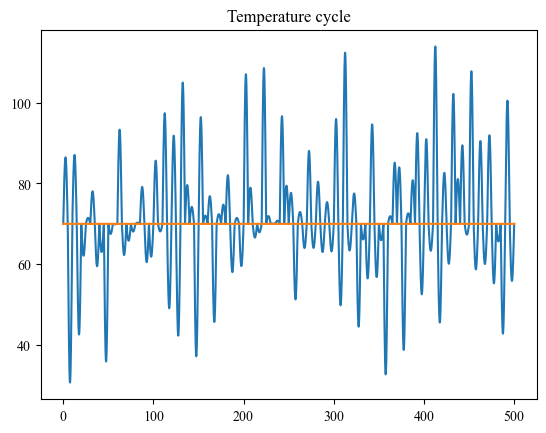

In [5]:
A = np.random.normal(12, 15, 5000)
period = np.random.normal(12, 15, 5000)
period = [-p for p in period if p < 0] + [p for p in period if p > 0]
adding = 70
cycle,distance = generate_cycle(A, period, 0, adding)
print(len(cycle))
x= np.arange(0, 500, 0.05)
plt.title("Temperature cycle")
plt.plot(x, cycle[:10000])
plt.plot(x, [adding for i in range(10000)])
plt.show()

In [6]:
A = np.random.normal(12, 15, 5000)
period = np.random.normal(12, 15, 5000)
period = [-p for p in period if p < 0] + [p for p in period if p > 0]
adding = 70
temp_cycle,temp_distance = generate_cycle(A, period, 0, adding)
x= np.arange(0, 5000, 0.05)


In [8]:
time = np.arange(0, 2000, 0.05)
def doCompetitionModel(A, period, adding, temp_cycle):
    rainfall_cycle,rainfall_distance = generate_cycle(A, period, np.pi/2 ,adding)
    rainfall_cycle = np.array(rainfall_cycle)
    temp_cycle, rainfall_cycle = np.array(temp_cycle), np.array(rainfall_cycle)
    df_predict = pd.DataFrame({'rainfall': rainfall_cycle})
    moisture_predicted_data = model.predict(df_predict)
    moisture_predicted_data = [round(i, 3) for i in moisture_predicted_data]
    def differential_function(variable_list, timespan, num_of_species, x_range_list, \
        distribution_list ,growth_rate_list, moisture, N_list, competition_matrix_list, cooperation_matrix_list,\
            ln_life_time_list, frequency_bias):
        polynomials = []
        real_growth_rate = []
        percentage = []
        for i in range(num_of_species):
            if (moisture>= x_range_list[i][0]) and (moisture<= x_range_list[i][1]):
                percentage.append(distribution_list[i][moisture])
            else:
                percentage.append(0)
        real_growth_rate = [i * j for i, j in zip(growth_rate_list, percentage)]
        compete_list = []
        coop_list = []
        for i in range(num_of_species):
            compete_list.append(sum(1/N_list[j] * competition_matrix_list[i][j] * variable_list[j] for j in range(num_of_species) if j != i))
            coop_list.append(sum(1/N_list[j] * cooperation_matrix_list[i][j] * variable_list[j] for j in range(num_of_species) if j != i))
        # compete_list, coop_list = softmax(compete_list), softmax(coop_list)
        for i in range(num_of_species):
            poly = real_growth_rate[i] * variable_list[i] * (1 - variable_list[i]/N_list[i] - compete_list[i] + coop_list[i]) * ln_life_time_list[i] / frequency_bias
            polynomials.append(poly)
        return np.array(polynomials)
    life_time_list = plant_info['Lifetime(year)'].values.tolist()
    ln_life_time_list = [np.log(i + np.e - 1) for i in life_time_list]
    period = np.random.normal(12, 15, 50000)
    period = [-p for p in period if p < 0] + [p for p in period if p > 0]
    def montecarlosimulation(indices):
        N_list = []
        for i in indices:
            if(i == 0 or i == 1 or i == 2):
                N_list.append(100)
            elif(i == 3 or i == 4):
                N_list.append(200)
            elif(i == 5 or i == 6):
                N_list.append(50)

        time = np.arange(0, 2000, 0.05)
        timespan = np.arange(0, 0.05, 0.01)
        variable_list = [10] * len(indices)
        num_of_species = len(indices)
        x_range_list = [x_ranges[i] for i in indices]
        all_distribution_list = [dict(zip(cs_x_distribution, cs_y_distribution)), dict(zip(cp_x_distribution, cp_y_distribution)), dict(zip(R_x_distribution, R_y_distribution)), dict(zip(BG_x_distribution, BG_y_distribution)), dict(zip(PR_x_distribution, PR_y_distribution)), dict(zip(DW_x_distribution, DW_y_distribution)), dict(zip(RW_x_distribution, RW_y_distribution))]
        distribution_list=[all_distribution_list[i] for i in indices]
        growth_rate_list = plant_info['Growth Rate'].values.tolist()
        growth_rate_list = [i for j, i in enumerate(growth_rate_list) if j in indices]
        competition_matrix = pd.read_csv("../Data/judge_matrix/Competition.csv")
        competition_matrix_list = []
        for index, value in enumerate(competition_matrix.values):
            if(index not in indices):
                continue
            value_list = [value.tolist()[1:][i] for i in range(len(value.tolist()[1:])) if i in indices]
            competition_matrix_list.append(value_list)
        cooperation_matrix = pd.read_csv("../Data/judge_matrix/Cooperation.csv")
        cooperation_matrix_list = []
        for index, value in enumerate(cooperation_matrix.values):
            if(index not in indices):
                continue
            value_list = [value.tolist()[1:][i] for i in range(len(value.tolist()[1:])) if i in indices]
            cooperation_matrix_list.append(value_list)
        solution_list = []
        for timestep in range(len(time)):
            frequency_bias = 1+(2*np.pi*(1/period[timestep]-1/12))**2
            moisture = moisture_predicted_data[timestep]
            solution = odeint(differential_function, variable_list, timespan, args=(num_of_species, x_range_list, distribution_list, growth_rate_list, moisture, N_list, competition_matrix_list, cooperation_matrix_list, ln_life_time_list, frequency_bias))
            solution = solution[-1]
            variable_list = solution.tolist()
            solution_list.append(solution)
        # cs_trend, cp_trend, R_trend, BG_trend, PR_trend, DW_trend, RW_trend = [i[0] for i in solution_list], [i[1] for i in solution_list], [i[2] for i in solution_list], [i[3] for i in solution_list], [i[4] for i in solution_list], [i[5] for i in solution_list], [i[6] for i in solution_list]
        species_solution = []
        for i in range(len(indices)):
            specie_solution = [j[i] for j in solution_list]
            species_solution.append(specie_solution)
        overflow = 0
        for i in range(len(indices)):
            if(species_solution[i][-1]/N_list[i] > 1):
                overflow += species_solution[i][-1]/N_list[i] - 1
        min_time_list = []
        idx_list = []
        for i in range(len(indices)):
            flag = True
            for idx, j in enumerate(species_solution[i]):
                if(abs(species_solution[i][idx] - species_solution[i][idx-100]) < 1e-1 and flag):
                    min_time_list.append(plant_info['PLANT'][indices[i]])
                    idx_list.append(time[idx])
                    flag = False
        average_population = 0
        num_non_extinct = 0
        for i in range(len(indices)):
            if(species_solution[i][-1] > 1e-1):
                average_population += species_solution[i][-1]
                num_non_extinct += 1
        return overflow/len(indices), max(idx_list), average_population/ num_non_extinct

    used_indices_list = []
    overflow_list = []
    equi_list = []
    aver_population_list = []
    while(len(used_indices_list) < 127):
        indice_length = random.randint(1, 7)
        indices = []
        while (len(indices) < indice_length):
            indice = random.randint(0, 6)
            if(indice not in indices):
                indices.append(indice)
        indices = sorted(indices)
        if(indices not in used_indices_list):
            overflow, eqil_time, aver_population = montecarlosimulation(indices)
            used_indices_list.append(indices)
            overflow_list.append(overflow)
            equi_list.append(eqil_time)
            aver_population_list.append(aver_population)
    return aver_population_list, used_indices_list
# montecarlosimulation(indices)


In [25]:
import random
overall_population = []
for i in range(10):
    overall_population.append([])
    A_mu, A_sigma = 5/3 * (i+1) , 5
    period_mu, period_sigma = 12 , 15
    
    A = np.random.normal(A_mu, A_sigma, 5000)
    period = np.random.normal(period_mu, period_sigma, 5000)
    period = [-p for p in period if p < 0] + [p for p in period if p > 0]
    adding = 0

    solution_list = doCompetitionModel(A, period, adding, temp_cycle)
    cs_trend, cp_trend, R_trend, BG_trend, PR_trend, DW_trend, RW_trend = [i[0] for i in solution_list], [i[1] for i in solution_list], [i[2] for i in solution_list], [i[3] for i in solution_list], [i[4] for i in solution_list], [i[5] for i in solution_list], [i[6] for i in solution_list]
    for timestep in range(len(time)):
        overall_population[i].append(sum(solution_list[timestep]))

TypeError: unsupported operand type(s) for +: 'int' and 'list'

ValueError: x and y must have same first dimension, but have shapes (40000,) and (0,)

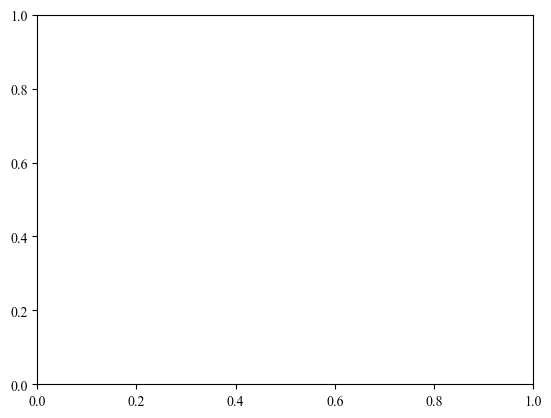

In [12]:
for i in range(10):
    plt.plot(time, overall_population[i], label = r'$V_{\mu}$ = ' + str(round(5/3 * (i+1), 2)))
    plt.legend()
    plt.xlabel('Time (Month)')
    plt.ylabel('Population')
    plt.title(r'Population Trend of Different $V_{\mu}$ (increasing)', fontdict={"size":15})
plt.show()


In [27]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
import numpy as np


In [65]:
steady_time = []
xvalue = []
base = overall_population[-1][-1]
for i in range(10):
    for j in range(len(overall_population[i])):
        if int(overall_population[i][j]) > 400:
            judge = overall_population[i][j:j+100]
            if max(judge)-min(judge)<1e3:
                print(time[j])
                steady_time.append(time[j])
                break
    xvalue.append(round(5/3 * (i+1), 2))
print(steady_time)
print(xvalue)
df=pd.DataFrame()
df['Population Stability Time'] = steady_time
df['Vμ'] = xvalue
fig=px.bar(df,  # 数据源
            x='Vμ',  # 横坐标：年份
            y='Population Stability Time',  # 纵坐标：人口
            text='Population Stability Time',  # 说明：人口
            color='Vμ',  # 颜色取值：根据平均寿命的值来取
            hover_name='Vμ', #控制点名称：年份
            width=1000, height=600
        )
fig.update_layout(title_text='Population Stability Time under Increasing Vμ',
                title_x=.5,
                titlefont=dict(size=28), 
                font=dict(family='Times New Roman',
                        size=18)
                )
# 注释坐标轴
fig.update_layout(xaxis_title='Vμ', 
                yaxis_title='Population Stability Time')
#柱形图文字格式
fig.update_traces(
                textposition='outside',
                texttemplate='%{text:3}')
# 设置间隙大小及文本大小
fig.update_layout(bargap=.4,
                uniformtext_minsize=8,
                uniformtext_mode='show')
fig.show()

285.15000000000003
391.40000000000003
391.55
602.8000000000001
627.95
812.1500000000001
947.8000000000001
1101.65
1274.2
1668.8000000000002
[285.15000000000003, 391.40000000000003, 391.55, 602.8000000000001, 627.95, 812.1500000000001, 947.8000000000001, 1101.65, 1274.2, 1668.8000000000002]
[1.67, 3.33, 5.0, 6.67, 8.33, 10.0, 11.67, 13.33, 15.0, 16.67]


In [68]:
overall_population4 = []
for i in range(10):
    overall_population4.append([])
    A_mu, A_sigma = 5/3 / (i+1) , 5
    period_mu, period_sigma = 12 , 15
    
    A = np.random.normal(A_mu, A_sigma, 5000)
    period = np.random.normal(period_mu, period_sigma, 5000)
    period = [-p for p in period if p < 0] + [p for p in period if p > 0]
    adding = 0

    solution_list = doCompetitionModel(A, period, adding, temp_cycle)
    cs_trend, cp_trend, R_trend, BG_trend, PR_trend, DW_trend, RW_trend = [i[0] for i in solution_list], [i[1] for i in solution_list], [i[2] for i in solution_list], [i[3] for i in solution_list], [i[4] for i in solution_list], [i[5] for i in solution_list], [i[6] for i in solution_list]
    for timestep in range(len(time)):
        overall_population4[i].append(sum(solution_list[timestep]))

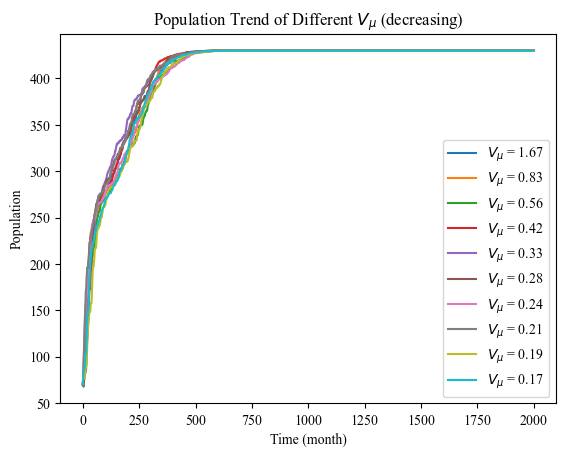

In [91]:
for i in range(10):
    plt.plot(time, overall_population4[i], label = r'$V_{\mu}$ = ' + str(round(5/3 / (i+1), 2)))
    plt.legend()
    plt.xlabel('Time (month)')
    plt.ylabel('Population')
    plt.title(r'Population Trend of Different $V_{\mu}$ (decreasing)')
plt.show()


In [7]:
overall_population = []
for i in range(10):
    overall_population.append([])
    A_mu, A_sigma = 5/3  , 5* (i+1)
    period_mu, period_sigma = 12 , 15
    
    A = np.random.normal(A_mu, A_sigma, 5000)
    period = np.random.normal(period_mu, period_sigma, 5000)
    period = [-p for p in period if p < 0] + [p for p in period if p > 0]
    adding = 0

    solution_list = doCompetitionModel(A, period, adding, temp_cycle)
    cs_trend, cp_trend, R_trend, BG_trend, PR_trend, DW_trend, RW_trend = [i[0] for i in solution_list], [i[1] for i in solution_list], [i[2] for i in solution_list], [i[3] for i in solution_list], [i[4] for i in solution_list], [i[5] for i in solution_list], [i[6] for i in solution_list]
    for timestep in range(len(time)):
        overall_population[i].append(sum(solution_list[timestep]))
for i in range(10):
    plt.plot(time, overall_population[i], label = r'$V_{\sigma}$ = ' + str(round(5/3 * (i+1), 2)))
    plt.legend()
    plt.xlabel('Time (year)')
    plt.ylabel('Population')
    plt.title(r'Population Trend of Different $V_{\sigma}$ (increasing)')
plt.show()
overall_population = []
for i in range(10):
    overall_population.append([])
    A_mu, A_sigma = 5/3  , 5/ (i+1)
    period_mu, period_sigma = 12 , 15
    
    A = np.random.normal(A_mu, A_sigma, 5000)
    period = np.random.normal(period_mu, period_sigma, 5000)
    period = [-p for p in period if p < 0] + [p for p in period if p > 0]
    adding = 0

    solution_list = doCompetitionModel(A, period, adding, temp_cycle)
    cs_trend, cp_trend, R_trend, BG_trend, PR_trend, DW_trend, RW_trend = [i[0] for i in solution_list], [i[1] for i in solution_list], [i[2] for i in solution_list], [i[3] for i in solution_list], [i[4] for i in solution_list], [i[5] for i in solution_list], [i[6] for i in solution_list]
    for timestep in range(len(time)):
        overall_population[i].append(sum(solution_list[timestep]))
for i in range(10):
    plt.plot(time, overall_population[i], label = r'$V_{\sigma}$ = ' + str(round(5/3 / (i+1), 2)))
    plt.legend()
    plt.xlabel('Time (year)')
    plt.ylabel('Population')
    plt.title(r'Population Trend of Different $V_{\sigma}$ (decreasing)')
plt.show()

NameError: name 'doCompetitionModel' is not defined

In [10]:
import random
overall_population = []
for i in range(10):
    overall_population.append([])
    A_mu, A_sigma = 5/3  , 5
    period_mu, period_sigma = 12 * (i+1), 15
    
    A = np.random.normal(A_mu, A_sigma, 5000)
    period = np.random.normal(period_mu, period_sigma, 5000)
    period = [-p for p in period if p < 0] + [p for p in period if p > 0]
    adding = 0

    solution_list = doCompetitionModel(A, period, adding, temp_cycle)
    cs_trend, cp_trend, R_trend, BG_trend, PR_trend, DW_trend, RW_trend = [i[0] for i in solution_list], [i[1] for i in solution_list], [i[2] for i in solution_list], [i[3] for i in solution_list], [i[4] for i in solution_list], [i[5] for i in solution_list], [i[6] for i in solution_list]
    for timestep in range(len(time)):
        overall_population[i].append(sum(solution_list[timestep]))
for i in range(10):
    plt.plot(time, overall_population[i], label = r'\frac{2\pi}{\omega}_{\mu} = ' + str(12 * (i+1)))
    plt.legend()
    plt.xlabel('Time (year)')
    plt.ylabel('Population')
    plt.title(r'Population Trend of Different \frac{2\pi}{\omega}_{\mu} (increasing)')
plt.show()
overall_population = []
for i in range(10):
    overall_population.append([])
    A_mu, A_sigma = 5/3  , 5
    period_mu, period_sigma = 12 / (i+1), 15
    
    A = np.random.normal(A_mu, A_sigma, 5000)
    period = np.random.normal(period_mu, period_sigma, 5000)
    period = [-p for p in period if p < 0] + [p for p in period if p > 0]
    adding = 0

    solution_list = doCompetitionModel(A, period, adding, temp_cycle)
    cs_trend, cp_trend, R_trend, BG_trend, PR_trend, DW_trend, RW_trend = [i[0] for i in solution_list], [i[1] for i in solution_list], [i[2] for i in solution_list], [i[3] for i in solution_list], [i[4] for i in solution_list], [i[5] for i in solution_list], [i[6] for i in solution_list]
    for timestep in range(len(time)):
        overall_population[i].append(sum(solution_list[timestep]))
for i in range(10):
    plt.plot(time, overall_population[i], label = r'\frac{2\pi}{\omega}_{\mu} = ' + str(round(12 / (i+1), 2)))
    plt.legend()
    plt.xlabel('Time (year)')
    plt.ylabel('Population')
    plt.title(r'Population Trend of Different \frac{2\pi}{\omega}_{\mu} (decreasing)')
plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'list'

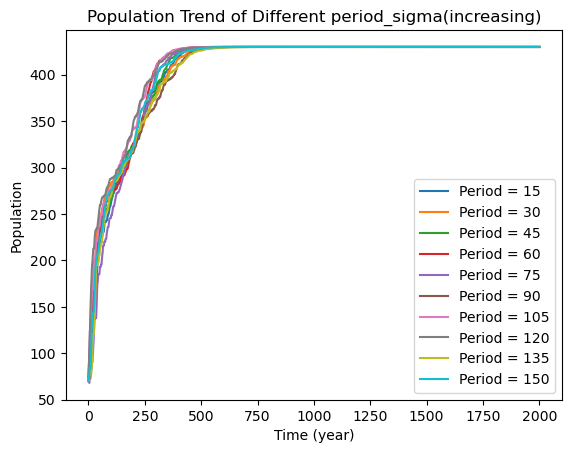

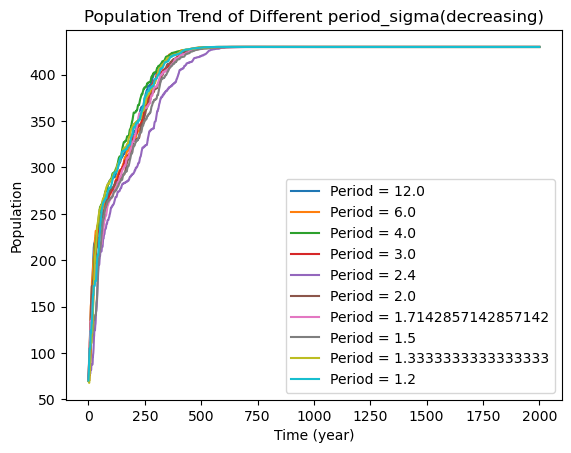

In [ ]:
overall_population = []
for i in range(10):
    overall_population.append([])
    A_mu, A_sigma = 5/3  , 5
    period_mu, period_sigma = 12 , 15 * (i+1)
    
    A = np.random.normal(A_mu, A_sigma, 5000)
    period = np.random.normal(period_mu, period_sigma, 5000)
    period = [-p for p in period if p < 0] + [p for p in period if p > 0]
    adding = 0

    solution_list = doCompetitionModel(A, period, adding, temp_cycle)
    cs_trend, cp_trend, R_trend, BG_trend, PR_trend, DW_trend, RW_trend = [i[0] for i in solution_list], [i[1] for i in solution_list], [i[2] for i in solution_list], [i[3] for i in solution_list], [i[4] for i in solution_list], [i[5] for i in solution_list], [i[6] for i in solution_list]
    for timestep in range(len(time)):
        overall_population[i].append(sum(solution_list[timestep]))
for i in range(10):
    plt.plot(time, overall_population[i], label = r'\frac{2\pi}{\omega}_{\sigma} = ' + str(15 * (i+1)))
    plt.legend()
    plt.xlabel('Time (year)')
    plt.ylabel('Population')
    plt.title(r'Population Trend of Different \frac{2\pi}{\omega}_{\sigma} (increasing)')
plt.show()
overall_population = []
for i in range(10):
    overall_population.append([])
    A_mu, A_sigma = 5/3  , 5
    period_mu, period_sigma = 12 , 15/ (i+1)
    
    A = np.random.normal(A_mu, A_sigma, 5000)
    period = np.random.normal(period_mu, period_sigma, 5000)
    period = [-p for p in period if p < 0] + [p for p in period if p > 0]
    adding = 0

    solution_list = doCompetitionModel(A, period, adding, temp_cycle)
    cs_trend, cp_trend, R_trend, BG_trend, PR_trend, DW_trend, RW_trend = [i[0] for i in solution_list], [i[1] for i in solution_list], [i[2] for i in solution_list], [i[3] for i in solution_list], [i[4] for i in solution_list], [i[5] for i in solution_list], [i[6] for i in solution_list]
    for timestep in range(len(time)):
        overall_population[i].append(sum(solution_list[timestep]))
for i in range(10):
    plt.plot(time, overall_population[i], label = r'\frac{2\pi}{\omega}_{\sigma} = ' + str(round(12 / (i+1), 2)))
    plt.legend()
    plt.xlabel('Time (year)')
    plt.ylabel('Population')
    plt.title(r'Population Trend of Different \frac{2\pi}{\omega}_{\mu}_{\sigma}(decreasing)')
plt.show()

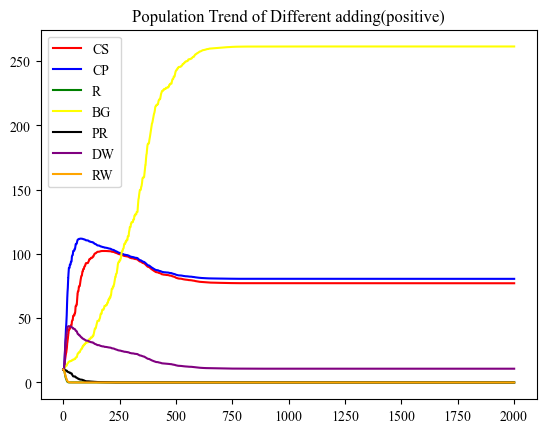

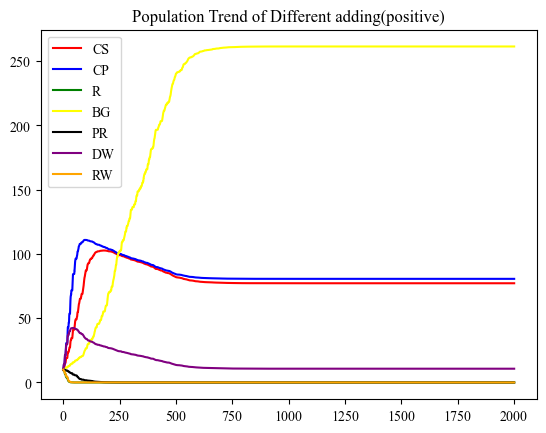

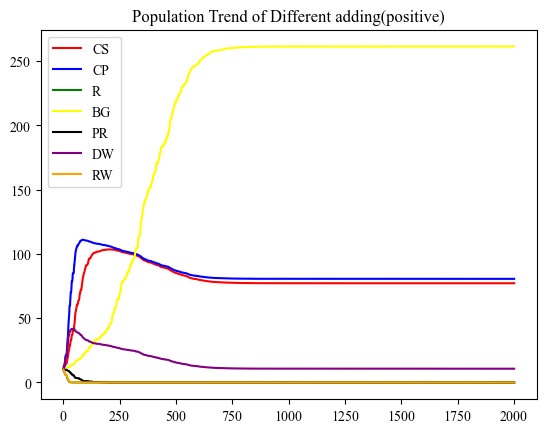

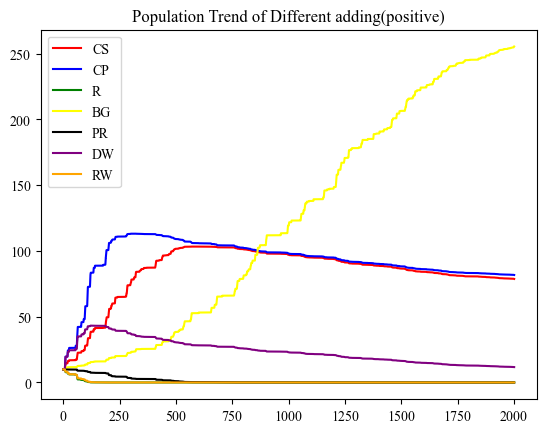

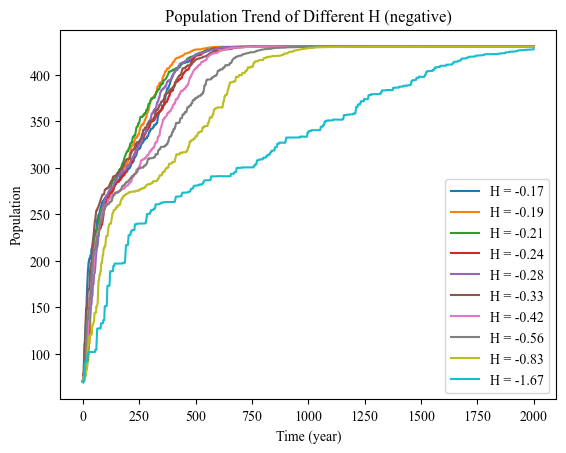

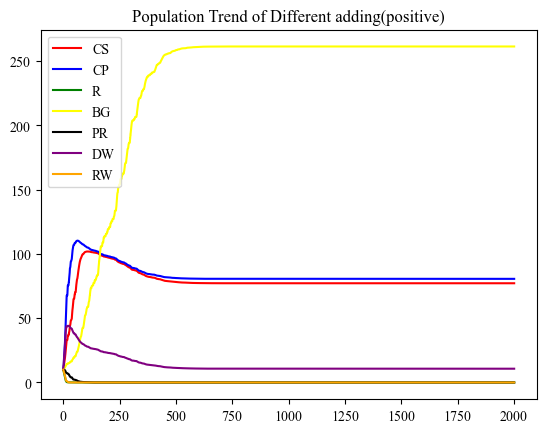

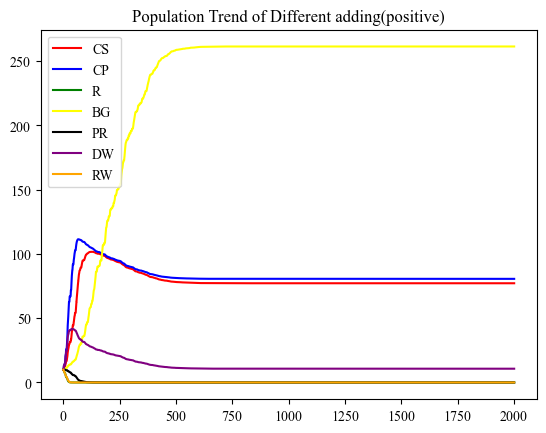

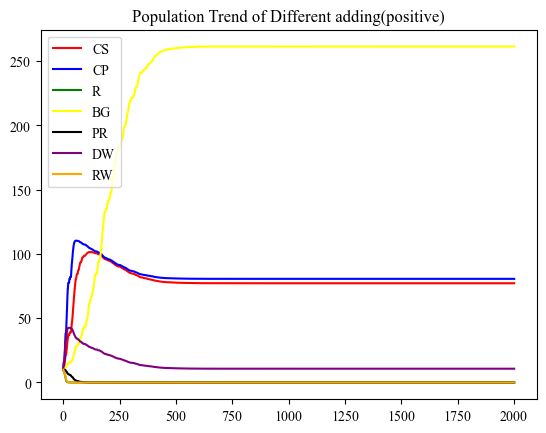

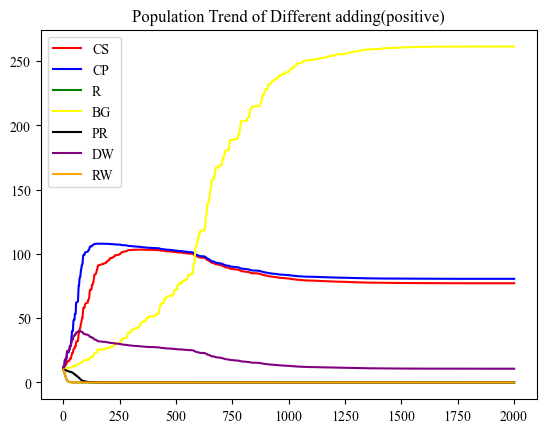

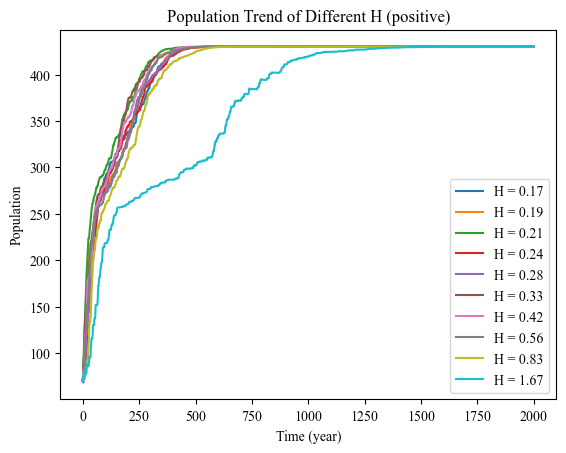

In [57]:
overall_population2 = []
for i in range(10):
    overall_population2.append([])
    A_mu, A_sigma = 5/3  , 5
    period_mu, period_sigma = 12 , 15 
    
    A = np.random.normal(A_mu, A_sigma, 5000)
    period = np.random.normal(period_mu, period_sigma, 5000)
    period = [-p for p in period if p < 0] + [p for p in period if p > 0]
    adding = -5 / (10-i)

    solution_list = doCompetitionModel(A, period, adding, temp_cycle)
    cs_trend, cp_trend, R_trend, BG_trend, PR_trend, DW_trend, RW_trend = [i[0] for i in solution_list], [i[1] for i in solution_list], [i[2] for i in solution_list], [i[3] for i in solution_list], [i[4] for i in solution_list], [i[5] for i in solution_list], [i[6] for i in solution_list]
    if(i % 3 == 0):
        plt.title('Population Trend of Different adding(positive)')
        plt.plot(time, cs_trend, color='red', label='CS')
        plt.plot(time, cp_trend, color='blue', label='CP')
        plt.plot(time, R_trend, color='green', label='R')
        plt.plot(time, BG_trend, color='yellow', label='BG')
        plt.plot(time, PR_trend, color='black', label='PR')
        plt.plot(time, DW_trend, color='purple', label='DW')
        plt.plot(time, RW_trend, color='orange', label='RW')
        plt.legend()
        plt.show()
    for timestep in range(len(time)):
        overall_population2[i].append(sum(solution_list[timestep]))
for i in range(10):
    plt.plot(time, overall_population2[i], label = 'H = ' + str(round(-5/3 / (10-i), 2)))
    plt.legend()
    plt.xlabel('Time (year)')
    plt.ylabel('Population')
    plt.title('Population Trend of Different H (negative)')
plt.show()
overall_population3 = []
for i in range(10):
    overall_population3.append([])
    A_mu, A_sigma = 5/3  , 5
    period_mu, period_sigma = 12 , 15
    A = np.random.normal(A_mu, A_sigma, 5000)
    period = np.random.normal(period_mu, period_sigma, 5000)
    period = [-p for p in period if p < 0] + [p for p in period if p > 0]
    adding = 5 / (10-i)

    solution_list = doCompetitionModel(A, period, adding, temp_cycle)
    cs_trend, cp_trend, R_trend, BG_trend, PR_trend, DW_trend, RW_trend = [i[0] for i in solution_list], [i[1] for i in solution_list], [i[2] for i in solution_list], [i[3] for i in solution_list], [i[4] for i in solution_list], [i[5] for i in solution_list], [i[6] for i in solution_list]
    if(i % 3 == 0):
        plt.title('Population Trend of Different adding(positive)')
        plt.plot(time, cs_trend, color='red', label='CS')
        plt.plot(time, cp_trend, color='blue', label='CP')
        plt.plot(time, R_trend, color='green', label='R')
        plt.plot(time, BG_trend, color='yellow', label='BG')
        plt.plot(time, PR_trend, color='black', label='PR')
        plt.plot(time, DW_trend, color='purple', label='DW')
        plt.plot(time, RW_trend, color='orange', label='RW')
        plt.legend()
        plt.show()
    for timestep in range(len(time)):
        overall_population3[i].append(sum(solution_list[timestep]))
for i in range(10):
    plt.plot(time, overall_population3[i], label = 'H = ' + str(round(5/3 / (10-i), 2)))
    plt.legend()
    plt.xlabel('Time (year)')
    plt.ylabel('Population')
    plt.title('Population Trend of Different H (positive)')
plt.show()

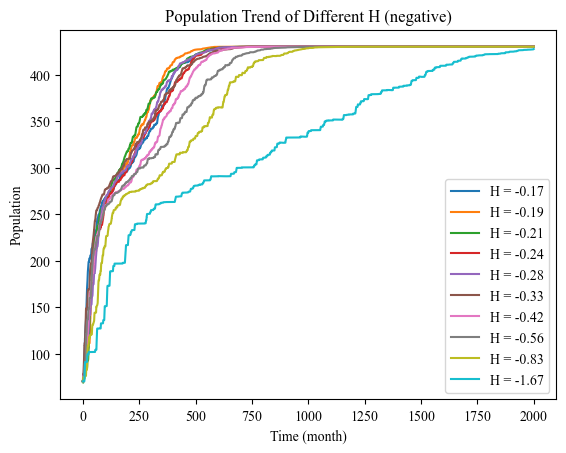

In [92]:
for i in range(10):
    plt.plot(time, overall_population2[i], label = 'H = ' + str(round(-5/3 / (10-i), 2)))
    plt.legend()
    plt.xlabel('Time (month)')
    plt.ylabel('Population')
    plt.title('Population Trend of Different H (negative)')
plt.show()

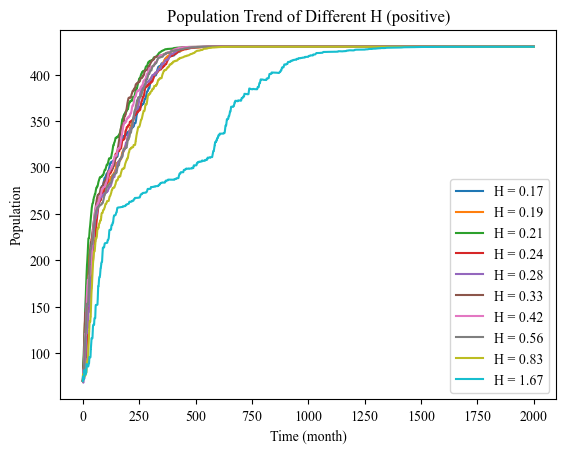

In [93]:
for i in range(10):
    plt.plot(time, overall_population3[i], label = 'H = ' + str(round(5/3 / (10-i), 2)))
    plt.legend()
    plt.xlabel('Time (month)')
    plt.ylabel('Population')
    plt.title('Population Trend of Different H (positive)')
plt.show()

In [89]:
steady_time = []
xvalue = []
base = overall_population2[-1][-1]
for i in range(10):
    for j in range(len(overall_population2[i])):
        if int(overall_population2[i][j]) > 400:
            judge = overall_population2[i][j:j+100]
            if max(judge)-min(judge)<1e3:
                print(time[j])
                steady_time.append(time[j])
                break
    xvalue.append(round(-5/3 / (10-i), 2))
print(steady_time)
print(xvalue)
df=pd.DataFrame()
df['Population Stability Time'] = steady_time
df['H'] = xvalue
df['x'] = np.linspace(1, 10, 10)
fig=px.bar(df,  # 数据源
            x='x',  # 横坐标：年份
            y='Population Stability Time',  # 纵坐标：人口
            text='Population Stability Time',  # 说明：人口
            color='H',  # 颜色取值：根据平均寿命的值来取
            hover_name='H', #控制点名称：年份
            width=1000, height=600
        )
fig.update_layout(title_text='Population Stability Time under H (negative)',
                title_x=.5,
                titlefont=dict(size=28), 
                font=dict(family='Times New Roman',
                        size=18)
                )
# 注释坐标轴
fig.update_layout(xaxis_title='H', 
                yaxis_title='Population Stability Time')
#柱形图文字格式
fig.update_traces(
                textposition='outside',
                texttemplate='%{text:3}')
# 设置间隙大小及文本大小
fig.update_layout(bargap=.4,
                uniformtext_minsize=8,
                uniformtext_mode='show')

fig.show()

403.70000000000005
362.6
379.8
445.1
401.95000000000005
436.5
485.90000000000003
595.8000000000001
707.0500000000001
1521.15
[403.70000000000005, 362.6, 379.8, 445.1, 401.95000000000005, 436.5, 485.90000000000003, 595.8000000000001, 707.0500000000001, 1521.15]
[-0.17, -0.19, -0.21, -0.24, -0.28, -0.33, -0.42, -0.56, -0.83, -1.67]


In [88]:
steady_time = []
xvalue = []
base = overall_population3[-1][-1]
for i in range(10):
    for j in range(len(overall_population3[i])):
        if int(overall_population3[i][j]) > 400:
            judge = overall_population3[i][j:j+100]
            if max(judge)-min(judge)<1e3:
                print(time[j])
                steady_time.append(time[j])
                break
    xvalue.append(round(5/3 / (10-i), 2))
print(steady_time)
print(xvalue)
df=pd.DataFrame()
df['Population Stability Time'] = steady_time
df['H'] = xvalue
df['x'] = np.linspace(1, 10, 10)
fig=px.bar(df,  # 数据源
            x='x',  # 横坐标：年份
            y='Population Stability Time',  # 纵坐标：人口
            text='Population Stability Time',  # 说明：人口
            color='H',  # 颜色取值：根据平均寿命的值来取
            hover_name='H', #控制点名称：年份
            width=1000, height=600
        )
fig.update_layout(title_text='Population Stability Time under H (positive)',
                title_x=.5,
                titlefont=dict(size=28), 
                font=dict(family='Times New Roman',
                        size=18)
                )
# 注释坐标轴
fig.update_layout(xaxis_title='H', 
                yaxis_title='Population Stability Time')
#柱形图文字格式
fig.update_traces(
                textposition='outside',
                texttemplate='%{text:3}')
# 设置间隙大小及文本大小
fig.update_layout(bargap=.4,
                uniformtext_minsize=8,
                uniformtext_mode='show')
fig.show()

326.45000000000005
319.70000000000005
259.5
319.8
320.6
272.1
286.95
292.25
355.1
836.3000000000001
[326.45000000000005, 319.70000000000005, 259.5, 319.8, 320.6, 272.1, 286.95, 292.25, 355.1, 836.3000000000001]
[0.17, 0.19, 0.21, 0.24, 0.28, 0.33, 0.42, 0.56, 0.83, 1.67]


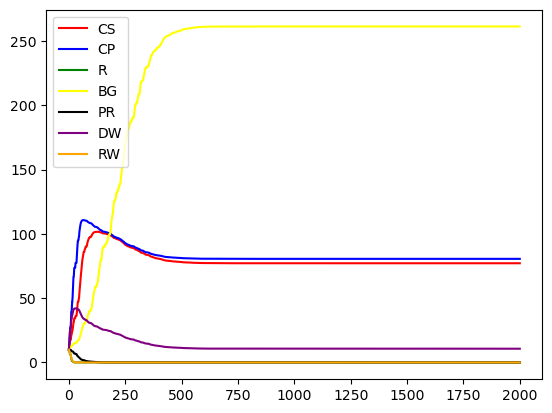

In [ ]:
plt.plot(time, cs_trend, color='red', label='CS')
plt.plot(time, cp_trend, color='blue', label='CP')
plt.plot(time, R_trend, color='green', label='R')
plt.plot(time, BG_trend, color='yellow', label='BG')
plt.plot(time, PR_trend, color='black', label='PR')
plt.plot(time, DW_trend, color='purple', label='DW')
plt.plot(time, RW_trend, color='orange', label='RW')
plt.legend()
plt.show()


[114.28571428571334, 110.040184937393, 112.02401120981247, 113.16349377447803, 112.15676477391186, 110.2364988768488, 107.47788093590691]


KeyboardInterrupt: 

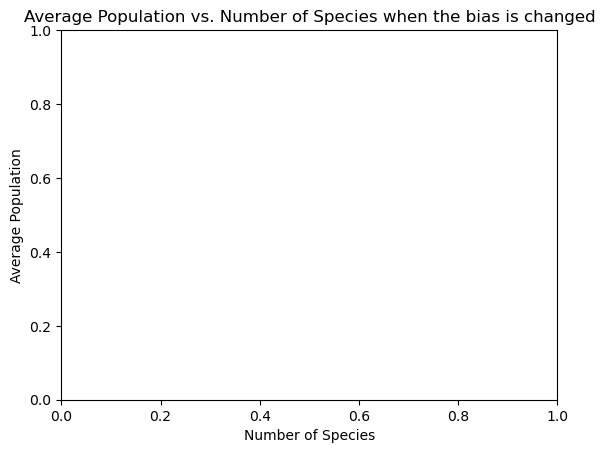

In [ ]:
overall_population = []
plt.title("Average Population vs. Number of Species when the bias is changed")
plt.xlabel("Number of Species")
plt.ylabel("Average Population")
for i in range(0,10,2):
    overall_population.append([])
    A_mu, A_sigma = 5/3  , 5
    period_mu, period_sigma = 12, 15
    A = np.random.normal(A_mu, A_sigma, 5000)
    period = np.random.normal(period_mu, period_sigma, 5000)
    period = [-p for p in period if p < 0] + [p for p in period if p > 0]
    adding = 5/3 * i
    adding_average_population_list, adding_used_indices_list = doCompetitionModel(A, period, adding, temp_cycle)
    population_dict = {}
    for i in range(7):
        population_dict[i] = []
    for idx, indices in enumerate(adding_used_indices_list):
        population_dict[len(indices) - 1].append(adding_average_population_list[idx])
    for i in range(7):
        population_dict[i] = np.mean(population_dict[i])
    population_list_adding = [population_dict[i] for i in range(7)]
    plt.plot(range(7), population_list_adding, label = "The bias = " + str(adding))
    print(population_list_adding)
plt.legend()
plt.show()


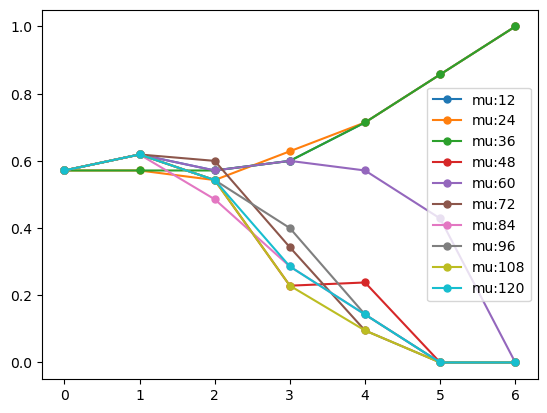

In [3]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn import linear_model
import math
### first we modify the frequency distribution mu
x1 = np.arange(0,7,1)
score_prob_list = []
score_prob_list.append([0.5714285714285714, 0.6190476190476191, 0.5714285714285714, 0.6, 0.7142857142857143, 0.8571428571428571, 1.0])
score_prob_list.append([0.5714285714285714, 0.5714285714285714, 0.5428571428571428, 0.6285714285714286, 0.7142857142857143, 0.8571428571428571, 1.0])
score_prob_list.append([0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.6, 0.7142857142857143, 0.8571428571428571, 1.0])
score_prob_list.append([0.5714285714285714, 0.6190476190476191, 0.5428571428571428, 0.22857142857142856, 0.23809523809523808, 0.0, 0.0])
score_prob_list.append([0.5714285714285714, 0.6190476190476191, 0.5714285714285714, 0.6, 0.5714285714285714, 0.42857142857142855, 0.0])
score_prob_list.append([0.5714285714285714, 0.6190476190476191, 0.6, 0.34285714285714286, 0.09523809523809523, 0.0, 0.0])
score_prob_list.append([0.5714285714285714, 0.6190476190476191, 0.4857142857142857, 0.2857142857142857, 0.14285714285714285, 0.0, 0.0])
score_prob_list.append([0.5714285714285714, 0.6190476190476191, 0.5428571428571428, 0.4, 0.14285714285714285, 0.0, 0.0])
score_prob_list.append([0.5714285714285714, 0.6190476190476191, 0.5428571428571428, 0.22857142857142856, 0.09523809523809523, 0.0, 0.0])
score_prob_list.append([0.5714285714285714, 0.6190476190476191, 0.5428571428571428, 0.2857142857142857, 0.14285714285714285, 0.0, 0.0])
for i in range(10):
    plt.plot(x1, score_prob_list[i], label = "mu:"+str(12 * (i+1)), marker = 'o', markersize = 5)
plt.legend()
plt.show()
